In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Generating 100 points equally distanced from $-20$ to $20$ and save as `x1`. Then creating $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.

In [ ]:
# create five independent variables
x1 = np.linspace(-20, 20, 100)
x2 = x1**2
x3 = x1**3
x4 = x1**4
x5 = x1**5

X = np.column_stack((x1, x2, x3, x4, x5))

Creating response variable `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.

In [ ]:
# create response variable
y = 1.75 + 5*x1 + 0.05*x3 - 10.3*x5 + np.random.normal(0, 2, 100)

In [ ]:
# split data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

To identify the optimal tuning parameter, we will first select 5 parameters within a broad range. This initial selection will help us determine the approximate region where the best parameter lies.

In [ ]:
# train a lasso regression using 5-fold cross validation
stage_1 = [1, 10, 100, 1000, 10000]

k = 5

R_squared_mean = np.zeros(len(stage_1))

mse_mean = np.zeros(len(stage_1))

for i in range(len(stage_1)):
      alpha = stage_1[i]
      print('alpha:', alpha)
      R_squared0 = 0
      mse0 = 0

      for train_index, test_index  in KFold(n_splits = k, shuffle=True, random_state=42).split(x_train):
         X_train, X_val = x_train[train_index], x_train[test_index]
         Y_train, Y_val = y_train[train_index], y_train[test_index]

         lasso_regression = Lasso(alpha= alpha, random_state=42)
         lasso_regression.fit(X_train, Y_train)

         R_squared = lasso_regression.score(X_train,Y_train)
         y_pred_lasso = lasso_regression.predict(X_val)
         mse = mean_squared_error(Y_val, y_pred_lasso)
         R_squared0 += R_squared
         mse0 += mse

      R_squared_mean[i] = R_squared0/k
      mse_mean[i] = mse0/k
      print('R_squared_mean:', R_squared_mean[i])
      print('mse_mean:', mse_mean[i])
      print()

alpha: 1
R_squared_mean: 0.9999999998307672
mse_mean: 23986.50269824246

alpha: 10
R_squared_mean: 0.999999999837538
mse_mean: 23058.426841749653

alpha: 100
R_squared_mean: 0.9999999998936143
mse_mean: 15268.165921554551

alpha: 1000
R_squared_mean: 0.9999999999962238
mse_mean: 471.61405675169306

alpha: 10000
R_squared_mean: 0.9999999999908967
mse_mean: 1143.9307592531136



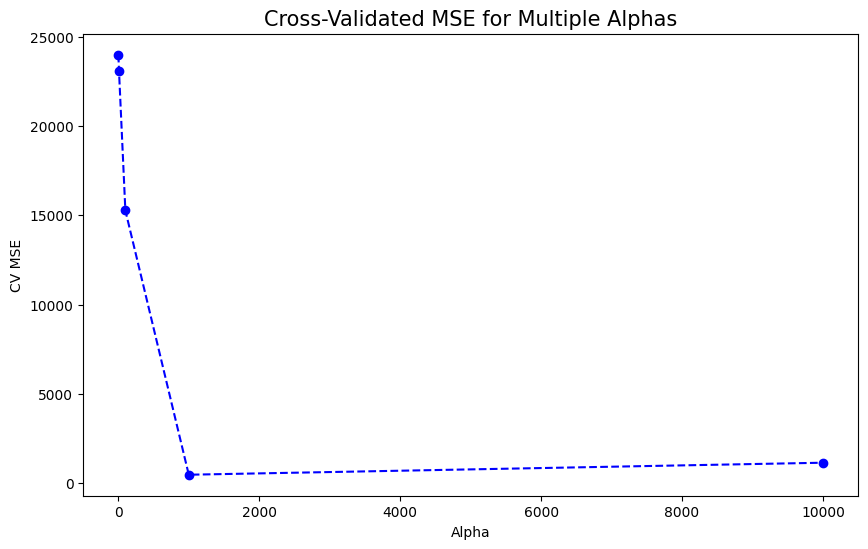

In [ ]:
figuresize = plt.figure(figsize=(10,6))
trainAcc = plt.plot(stage_1, mse_mean, '--bo')
title = plt.title('Cross-Validated MSE for Multiple Alphas', fontsize=15)
xlab = plt.xlabel('Alpha', fontsize=10)
ylab = plt.ylabel('CV MSE', fontsize=10)


It is clear that the optimal tuning parameter will lie around 1000. Therefore, in the next step, we will test 5 tuning parameters within a narrow range around 1000 to pinpoint the optimal value more precisely

In [ ]:
# train a lasso regression using 5-fold cross validation
stage_2 = [850, 900, 950, 1050, 1100]

k = 5


R_squared_mean = np.zeros(len(stage_2))

mse_mean = np.zeros(len(stage_2))

for i in range(len(stage_2)):
      alpha = stage_2[i]
      print('alpha:', alpha)
      R_squared0 = 0
      mse0 = 0

      for train_index, test_index  in KFold(n_splits = k, shuffle=True, random_state=42).split(x_train):
         X_train, X_val = x_train[train_index], x_train[test_index]
         Y_train, Y_val = y_train[train_index], y_train[test_index]

         lasso_regression = Lasso(alpha= alpha, random_state=42)
         lasso_regression.fit(X_train, Y_train)

         R_squared = lasso_regression.score(X_train,Y_train)
         y_pred_lasso = lasso_regression.predict(X_val)
         mse = mean_squared_error(Y_val, y_pred_lasso)
         R_squared0 += R_squared
         mse0 += mse

      R_squared_mean[i] = R_squared0/k
      mse_mean[i] = mse0/k
      print('R_squared_mean:', R_squared_mean[i])
      print('mse_mean:', mse_mean[i])
      print()

alpha: 850
R_squared_mean: 0.9999999999958271
mse_mean: 510.44315434057444

alpha: 900
R_squared_mean: 0.9999999999961359
mse_mean: 479.543380195152

alpha: 950
R_squared_mean: 0.9999999999962454
mse_mean: 467.57023535691013

alpha: 1050
R_squared_mean: 0.9999999999961938
mse_mean: 473.5831418504139

alpha: 1100
R_squared_mean: 0.9999999999961606
mse_mean: 478.82114432010167



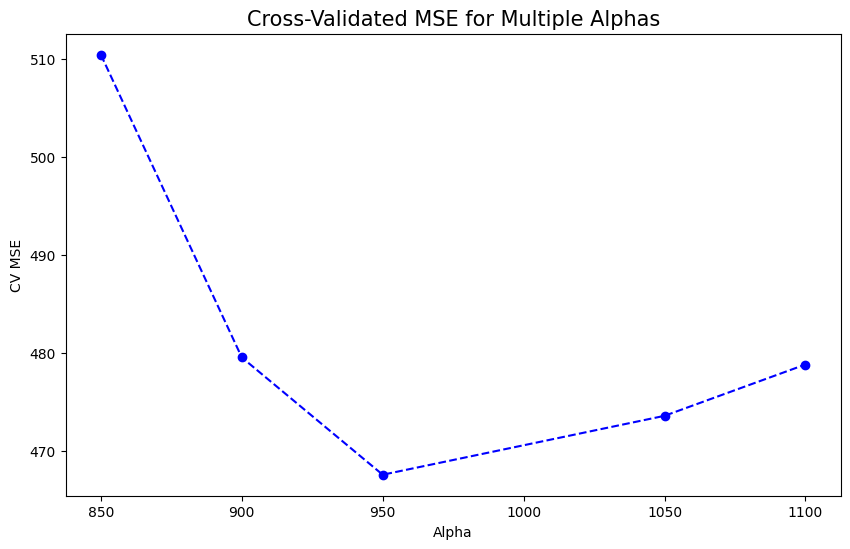

In [ ]:
figuresize = plt.figure(figsize=(10,6))
trainMSE = plt.plot(stage_2, mse_mean, '--bo')
title = plt.title('Cross-Validated MSE for Multiple Alphas', fontsize=15)
xlab = plt.xlabel('Alpha', fontsize=10)
ylab = plt.ylabel('CV MSE', fontsize=10)

After using cross validation for 10 tuning parameters to find the optimal, 950 seems to be the best one. We now can use this parameter on the test data to evaluate the model.

In [ ]:
# evaluate model with alpha = 950 with test data
lasso_regression = Lasso(alpha= 950, random_state=42)
lasso_regression.fit(x_train, y_train)
y_pred_lasso = lasso_regression.predict(x_test)
print('R_squared:', lasso_regression.score(x_train,y_train))
print('mse:', mean_squared_error(y_test, y_pred_lasso))

R_squared: 0.9999999999962302
mse: 554.2002966451369



To confirm that variable selection occurred during this Lasso regression, we can examine the coefficients of the model.


In [ ]:
lasso_regression.coef_

array([ 0.00000000e+00,  0.00000000e+00,  6.94199982e-02, -3.63639203e-05,
       -1.03000112e+01])

In [ ]:
# find whether features selected or not during lasso regression
lasso_regression.coef_ != 0

array([False, False,  True,  True,  True])

As it is shown, 3 out of 5 initial variables were chosen in the model.